<a href="https://colab.research.google.com/github/Satwikram/Named-Entity-Recognition/blob/main/Named%20Entity%20Recognition%20using%20DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

**Named Entity Recognition on Dataset Using NLP**

Context:
Annotated Corpus for Named Entity Recognition using GMB(Groningen Meaning Bank) corpus for entity classification with enhanced and popular features by Natural Language Processing applied to the data set.

geo = Geographical Entity

org = Organization

per = Person

gpe = Geopolitical Entity

tim = Time indicator

art = Artifact

eve = Event

nat = Natural Phenomenon

### Connecting to Kaggle

In [ ]:
from google.colab import files

files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


### Downloading Dataset 

In [ ]:
!kaggle datasets download -d abhinavwalia95/entity-annotated-corpus

 34% 9.00M/26.4M [00:00<00:00, 34.7MB/s]
100% 26.4M/26.4M [00:00<00:00, 66.8MB/s]


In [ ]:
!unzip /content/entity-annotated-corpus.zip

Archive:  /content/entity-annotated-corpus.zip
  inflating: ner.csv                 
  inflating: ner_dataset.csv         


### Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math 
from bs4 import BeautifulSoup

### Importing Dataset

In [ ]:
dataset = pd.read_csv("/content/ner_dataset.csv", encoding = "latin1")

In [ ]:
dataset.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


### Basic Info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [ ]:
dataset.describe()

,Sentence #,Word,POS,Tag
count,47959,1048575,1048575,1048575
unique,47959,35178,42,17
top,Sentence: 12133,the,NN,O
freq,1,52573,145807,887908


### Checking for Null Values

In [ ]:
dataset.isna().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

### Dropping Unwanted Columns

In [ ]:
dataset.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [ ]:
columns = ['Sentence #', 'POS']

In [ ]:
dataset.drop(columns = columns, axis = 1, inplace = True)

In [ ]:
dataset.head()

,Word,Tag
0,Thousands,O
1,of,O
2,demonstrators,O
3,have,O
4,marched,O


### Plotting Different Sentiment

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


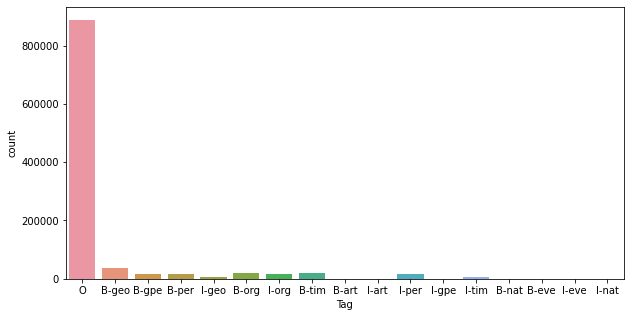

In [ ]:
plt.figure(figsize = (10, 5) )
sns.countplot(dataset['Tag'], label = 'Count')

### Getting Unique Values

In [ ]:
dataset['Tag'].nunique()

17

In [ ]:
len(dataset)

1048575

In [ ]:
dataset['Tag'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [ ]:
2**20

1048576

In [ ]:
dataset['Word']

0              Thousands
1                     of
2          demonstrators
3                   have
4                marched
               ...      
1048570             they
1048571        responded
1048572               to
1048573              the
1048574           attack
Name: Word, Length: 1048575, dtype: object

### Cleaning The Dataset if noise exits

In [ ]:
def clean_data(word):
  word = BeautifulSoup(word, 'lxml').get_text()
  word = re.sub(r"@[A-Za-z0-9]+", "", word)
  word = re.sub(r"https?://[A-Za-z0-9./]", "", word)
  word = re.sub(r"[^A-Za-z]", "", word)
  word = re.sub(r" +", '', word)
  return word

In [ ]:
from tqdm import tqdm

In [ ]:
dataset['Word'][0]

'Thousands'

In [ ]:
for i in tqdm(range(len(dataset))):
  dataset['Word'][i] = clean_data(dataset['Word'][i])

  0%|          | 0/1048575 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
  1%|▏         | 13146/1048575 [00:45<1:00:33, 284.96it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
 19%|█▊        | 196088/1048575 [14:41<1:16:46, 185.06it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.celebritiesforcharity.org/raffles/netraffle_main.cfm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
 46%|█

Buffered data was truncated after reaching the output size limit.

In [ ]:
dataset.to_csv("NER_Cleaned.csv", index = None, header = True)

### Loading cleaned file

In [168]:
ner_dataset = pd.read_csv("/content/NER_Cleaned.csv")

In [169]:
ner_dataset.head()

,Word,Tag
0,Thousands,O
1,of,O
2,demonstrators,O
3,have,O
4,marched,O


In [170]:
len(ner_dataset)

1048575

### Checking for NaN Values After Cleaning

In [171]:
ner_dataset.isna().sum()

Word    103876
Tag          0
dtype: int64

### Dropping NaN Values

In [172]:
ner_dataset.dropna(inplace = True)

In [173]:
ner_dataset.isna().sum()

Word    0
Tag     0
dtype: int64

In [174]:
len(ner_dataset)

944699

In [175]:
2**20

1048576

### Tokenization

In [176]:
import tensorflow_datasets as tfds

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    ner_dataset['Word'],
    target_vocab_size = 2**20
)

### Saving The Tokenizer

In [ ]:
tokenizer.save_to_file('ner_tokenizer')

In [ ]:
ner_dataset['Word']

0              Thousands
1                     of
2          demonstrators
3                   have
4                marched
               ...      
1048570             they
1048571        responded
1048572               to
1048573              the
1048574           attack
Name: Word, Length: 944699, dtype: object

### Loading Tokenizer

In [178]:
encoder = tfds.deprecated.text.SubwordTextEncoder.load_from_file("ner_tokenizer")

**Testing Tokenizer**

In [179]:
ids = encoder.encode("hello world")

In [180]:
text = encoder.decode([23108, 32928, 32849, 138])

In [181]:
print(ids)
print(text)

[23108, 32928, 32849, 138]
hello world


In [182]:
cleaned_data = ner_dataset.copy()

In [183]:
cleaned_data.head()

,Word,Tag
0,Thousands,O
1,of,O
2,demonstrators,O
3,have,O
4,marched,O


### Tokenizing the Dataset

In [184]:
cleaned_data['Word'][2]

'demonstrators'

In [185]:
from tqdm import tqdm

In [186]:
data_input = [encoder.encode(sentence) for sentence in cleaned_data['Word']]

In [187]:
data_input[100]

[1629]

### MAX LEN

In [188]:
MAX_LEN = max([len(sentence) for sentence in data_input])

In [189]:
MAX_LEN

3

In [190]:
for sentence in data_input:
  if len(sentence) == MAX_LEN:
    print(sentence)

[19440, 22734, 22559]


### Lets Check it out

In [191]:
encoder.decode([19440, 22734, 22559])

'wwcelebritiesforcharityorgrafflesnetrafflemaincfm'

In [192]:
for sentence in ner_dataset['Word']:
  if sentence == 'wwcelebritiesforcharityorgrafflesnetrafflemaincfm':
    print(sentence)

wwcelebritiesforcharityorgrafflesnetrafflemaincfm


### Padding

In [193]:
import tensorflow as tf
from tensorflow import keras

In [194]:
data_input = tf.keras.preprocessing.sequence.pad_sequences(
    data_input, value = 0, padding = 'post', maxlen = MAX_LEN 
)

In [195]:
data_input[0]

array([1085,    0,    0], dtype=int32)

### Taking X and Y

In [196]:
X = []
y = []

In [197]:
data_labels = [tag for tag in cleaned_data['Tag']]

In [198]:
len(data_labels)

944699

In [199]:
len(data_input)

944699

###Creating DataFrame

In [200]:
encoder.decode(data_input[120])

'London'

In [201]:
data_labels[120]

'B-geo'

In [202]:
list_data = data_input.tolist()

In [203]:
list_data[0]

[1085, 0, 0]

In [204]:
ner_df = pd.DataFrame({'Vectors': list_data, 'Tags': data_labels})

In [205]:
ner_df.head()

,Vectors,Tags
0,"[1085, 0, 0]",O
1,"[2, 0, 0]",O
2,"[1126, 0, 0]",O
3,"[12, 0, 0]",O
4,"[1795, 0, 0]",O


In [ ]:
ner_df.to_csv('cleaned_vectors.csv')

Taking X and Y

In [206]:
ner_df['Tags'] = pd.Categorical(ner_df['Tags'])

In [207]:
ner_df['Tags'].dtype

CategoricalDtype(categories=['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org',
                  'B-per', 'B-tim', 'I-art', 'I-eve', 'I-geo', 'I-gpe',
                  'I-nat', 'I-org', 'I-per', 'I-tim', 'O'],
                 ordered=False)

In [208]:
cat = pd.Categorical(ner_df['Tags']).codes

In [210]:
import joblib

In [211]:
joblib.dump(cat, 'cat.pickle')

['cat.pickle']

In [212]:
ner_df['Tags'] = pd.Categorical(ner_df['Tags']).codes

In [213]:
ner_df['Tags'].head()

0    16
1    16
2    16
3    16
4    16
Name: Tags, dtype: int8

In [214]:
X = data_input

In [215]:
X

array([[1085,    0,    0],
       [   2,    0,    0],
       [1126,    0,    0],
       ...,
       [   4,    0,    0],
       [   1,    0,    0],
       [ 103,    0,    0]], dtype=int32)

In [216]:
y = ner_df['Tags']

In [217]:
y.nunique()

17

In [218]:
y = tf.keras.utils.to_categorical(y, num_classes = 17)

In [219]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [220]:
len(X) * 0.2

188939.80000000002

### Splitting Data into Train and Test

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [222]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

755759
188940
755759
188940


In [223]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [224]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [225]:
type(X_train[0])

numpy.ndarray

In [226]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

### Config

In [355]:
VOCAB_SIZE = encoder.vocab_size
print(VOCAB_SIZE)

33073


### Building Model

In [357]:
model = Sequential()
model.add(Embedding(VOCAB_SIZE, 128))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(17, activation = 'softmax'))

### Compiling the model

In [364]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [365]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 128)         4233344   
_________________________________________________________________
bidirectional_21 (Bidirectio (None, None, 256)         263168    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, None, 256)         394240    
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 256)               394240    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

### Callbacks

In [366]:
from livelossplot.tf_keras import PlotLossesCallback
from livelossplot import PlotLossesKeras

In [367]:
checkpoint = ModelCheckpoint('ner.h5',
                              monitor = 'val_loss',
                              save_best_only = True,
                              verbose = 1)

In [368]:
earlystopping = EarlyStopping( monitor = 'val_loss', verbose = 1, restore_best_weights = True,
                                                 patience = 5)

In [369]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience = 3, min_lr=0.001, verbose = 1)

In [371]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [372]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)

In [373]:
callbacks = [checkpoint, earlystopping, reduce_lr, lr_schedule, PlotLossesKeras()]

### Training the model!

In [ ]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 1024, validation_split = 0.2, callbacks = callbacks)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 1/25
122/591 [=====>........................] - ETA: 4:06 - loss: 0.8168 - accuracy: 0.8363